In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
%matplotlib inline

In [2]:
train_data = pd.read_csv(r'C:\Users\USER-PC\Documents\Data Science\data set\DSN\Service provider/Train.csv')
test_data = pd.read_csv(r'C:\Users\USER-PC\Documents\Data Science\data set\DSN/Service provider/Test.csv')
submit = pd.read_csv(r'C:\Users\USER-PC\Documents\Data Science\data set\DSN/Service provider/sample_submission.csv')

In [3]:
train_data.head(2)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0


        Determine the raltionship between region and churn, tenure, monthly rate, frequency of recharge, monthly revenue, income in 90 days/3, earning frequency, data volume purchased, top pack(top 50 analysis), top pack frequency, churn.

In [4]:
train_data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [5]:
test_data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,65049.000000,65049.000000,66510.000000,66510.000000,66510.000000,50662.000000,63617.000000,58800.000000,40212.000000,7680.000000,6422.000000,100000.000000,58297.000000
mean,5545.613630,11.545051,5518.341663,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,8.373307,7.678138,28.122430,9.276035
std,7123.955226,13.271270,7177.840304,2392.609422,14.655983,10515.256185,870.773904,201.962296,66.932661,40.822161,32.259672,22.324101,12.369808
min,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,268.000000,27.000000,28.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,7400.000000,16.000000,7399.000000,2466.000000,20.000000,2923.000000,157.000000,99.000000,20.000000,4.000000,5.000000,51.000000,12.000000
max,201500.000000,120.000000,181135.000000,60378.000000,91.000000,474262.000000,24887.000000,5695.000000,3083.000000,1366.000000,1017.000000,62.000000,390.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         100000 non-null  object 
 1   REGION          60707 non-null   object 
 2   TENURE          100000 non-null  object 
 3   MONTANT         65049 non-null   float64
 4   FREQUENCE_RECH  65049 non-null   float64
 5   REVENUE         66510 non-null   float64
 6   ARPU_SEGMENT    66510 non-null   float64
 7   FREQUENCE       66510 non-null   float64
 8   DATA_VOLUME     50662 non-null   float64
 9   ON_NET          63617 non-null   float64
 10  ORANGE          58800 non-null   float64
 11  TIGO            40212 non-null   float64
 12  ZONE1           7680 non-null    float64
 13  ZONE2           6422 non-null    float64
 14  MRG             100000 non-null  object 
 15  REGULARITY      100000 non-null  int64  
 16  TOP_PACK        58297 non-null   object 
 17  FREQ_TOP_PA

In [8]:
train_data.nunique()

user_id           400000
REGION                14
TENURE                 8
MONTANT             2421
FREQUENCE_RECH       111
REVENUE            23760
ARPU_SEGMENT       11014
FREQUENCE             91
DATA_VOLUME        22229
ON_NET              5996
ORANGE              2072
TIGO                 805
ZONE1                319
ZONE2                255
MRG                    1
REGULARITY            62
TOP_PACK             111
FREQ_TOP_PACK        170
CHURN                  2
dtype: int64

In [9]:
test_data['CHURN'] = 'test'

In [10]:
train_data.set_index('user_id', inplace = True)
test_data.set_index('user_id', inplace = True)

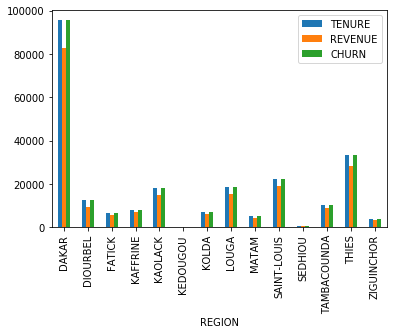

In [11]:
train_data[['REGION','TENURE', 'REVENUE', 'CHURN']].groupby(['REGION']).count().plot(kind = 'bar')

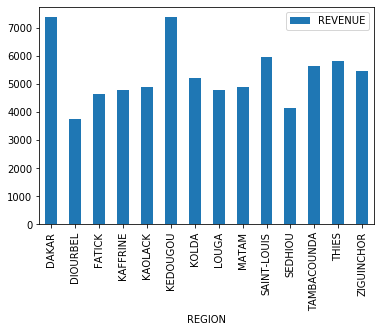

In [12]:
train_data[['REGION','TENURE', 'REVENUE']].groupby(['REGION']).mean().plot(kind = 'bar')

In [13]:
train_data.groupby(['CHURN', 'ON_NET']).count()['TENURE']

CHURN  ON_NET 
0      0.0        17328
       1.0        15535
       2.0        10088
       3.0         7267
       4.0         6655
                  ...  
1      7711.0         1
       8604.0         1
       8833.0         1
       8841.0         1
       10557.0        1
Name: TENURE, Length: 6639, dtype: int64

In [14]:
#sns.lmplot('REVENUE', 'ON_NET', hue='CHURN', data = train_data)

In [15]:
#sns.lmplot('REVENUE', 'MONTANT', hue='CHURN', data = train_data)

In [16]:
#data = pd.concat([train_data, test_data]).reset_index(drop= True)
#data.tail()

missing_col = data.columns[data.isna().any()]
missing_col

In [17]:
train_data.set_index(['TENURE', 'REGULARITY', 'FREQUENCE_RECH', 'FREQUENCE', 'TOP_PACK'], inplace=True)
train_data.fillna(method= 'bfill', inplace = True)

In [18]:
train_data.reset_index(inplace=True)
train_data.head(2)

,TENURE,REGULARITY,FREQUENCE_RECH,FREQUENCE,TOP_PACK,REGION,MONTANT,REVENUE,ARPU_SEGMENT,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,FREQ_TOP_PACK,CHURN
0,K > 24 month,62,32.0,34.0,All-net 500F=2000F;5d,SAINT-LOUIS,17000.0,18000.0,6000.0,1764.0,97.0,355.0,6.0,0.0,2.0,NO,35.0,0
1,K > 24 month,40,29.0,37.0,"Data: 100 F=40MB,24H",TAMBACOUNDA,4300.0,4427.0,1476.0,1764.0,8.0,3.0,0.0,0.0,2.0,NO,22.0,0


In [19]:
train_data.set_index(['REGION', 'DATA_VOLUME'], inplace=True)

In [20]:
train_data.fillna(method= 'bfill', inplace = True)

In [21]:
train_data.reset_index(inplace=True)
train_data.head(2)

,REGION,DATA_VOLUME,TENURE,REGULARITY,FREQUENCE_RECH,FREQUENCE,TOP_PACK,MONTANT,REVENUE,ARPU_SEGMENT,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,FREQ_TOP_PACK,CHURN
0,SAINT-LOUIS,1764.0,K > 24 month,62,32.0,34.0,All-net 500F=2000F;5d,17000.0,18000.0,6000.0,97.0,355.0,6.0,0.0,2.0,NO,35.0,0
1,TAMBACOUNDA,1764.0,K > 24 month,40,29.0,37.0,"Data: 100 F=40MB,24H",4300.0,4427.0,1476.0,8.0,3.0,0.0,0.0,2.0,NO,22.0,0


In [22]:
train_data.dropna(inplace=True)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399955 entries, 0 to 399954
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          399955 non-null  object 
 1   DATA_VOLUME     399955 non-null  float64
 2   TENURE          399955 non-null  object 
 3   REGULARITY      399955 non-null  int64  
 4   FREQUENCE_RECH  399955 non-null  float64
 5   FREQUENCE       399955 non-null  float64
 6   TOP_PACK        399955 non-null  object 
 7   MONTANT         399955 non-null  float64
 8   REVENUE         399955 non-null  float64
 9   ARPU_SEGMENT    399955 non-null  float64
 10  ON_NET          399955 non-null  float64
 11  ORANGE          399955 non-null  float64
 12  TIGO            399955 non-null  float64
 13  ZONE1           399955 non-null  float64
 14  ZONE2           399955 non-null  float64
 15  MRG             399955 non-null  object 
 16  FREQ_TOP_PACK   399955 non-null  float64
 17  CHURN     

for col in missing_col.drop(['REGION', 'TOP_PACK']):
    data[col].fillna(data[col].median(), inplace= True)
    
for col in ['TOP_PACK', 'REGION']:
    data[col].fillna(col + '_NAN', inplace = True)

In [24]:
#train_data['MONTANT'] = train_data['user_id'].map(G1)
#train_data.groupby(['user_id','TENURE', 'REGULARITY', 'MRG', 'CHURN']).mean()['MONTANT'].fillna(method= 'ffill')

In [25]:
from scipy.stats import skew, norm

In [26]:
numeric = train_data.select_dtypes(include = 'number').columns
skew_features = train_data[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5:".format(high_skew.shape[0]))
skew_features.head(18)

There are 13 numerical features with Skew > 0.5:


DATA_VOLUME       27.073662
ZONE1             14.707960
ZONE2             14.372315
TIGO              11.026815
ON_NET             8.470733
ORANGE             7.222357
MONTANT            4.179916
FREQ_TOP_PACK      3.935059
ARPU_SEGMENT       3.809612
REVENUE            3.809598
FREQUENCE_RECH     2.119393
FREQUENCE          1.775868
CHURN              1.604556
REGULARITY         0.247949
dtype: float64

In [27]:
train_data.head(2)

,REGION,DATA_VOLUME,TENURE,REGULARITY,FREQUENCE_RECH,FREQUENCE,TOP_PACK,MONTANT,REVENUE,ARPU_SEGMENT,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,FREQ_TOP_PACK,CHURN
0,SAINT-LOUIS,1764.0,K > 24 month,62,32.0,34.0,All-net 500F=2000F;5d,17000.0,18000.0,6000.0,97.0,355.0,6.0,0.0,2.0,NO,35.0,0
1,TAMBACOUNDA,1764.0,K > 24 month,40,29.0,37.0,"Data: 100 F=40MB,24H",4300.0,4427.0,1476.0,8.0,3.0,0.0,0.0,2.0,NO,22.0,0


for col in ['REVENUE', 'MONTANT', 'ORANGE']:
    fig, ax = plt.subplots(1, 2)
    
    sns.distplot(train_data[col], ax = ax[0])
    sns.distplot(train_data[col], ax = ax[1])
    
    plt.tight_layout()

In [28]:
#data.drop(['MRG', 'ZONE1', 'ZONE2', 'TOP_PACK', 'FREQUENCE', 'ARPU_SEGMENT', 'TIGO', 'TENURE', 'FREQ_TOP_PACK'], 1, inplace = True)

In [29]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
cat_cols = ['TENURE', 'REGION', 'MRG', 'TOP_PACK' ]

for col in cat_cols:
    train_data[col] = train_data[col].astype('str')
    test_data[col]  = test_data[col].astype('str')
    
    train_data[col] = enc.fit_transform(train_data[col])
    test_data[col]  = enc.fit_transform(test_data[col])

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [31]:
X = train_data.drop(['CHURN', 'ZONE1', 'ZONE2',  'DATA_VOLUME', 'TIGO', 'ON_NET',  'TIGO', 'ORANGE', 'FREQ_TOP_PACK', 'MRG',
                   'MONTANT', 'ARPU_SEGMENT', 'FREQUENCE_RECH', 'REVENUE', 'REGION'], 1)
y = train_data.CHURN
#cat_cols = ['TENURE', 'REGION', 'MRG', 'TOP_PACK' ]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
attributes_train = X_train
label_train = y_train

attributes_test_a = X_test
label_test_a = y_test

attributes_test = test_data.drop(['CHURN', 'ZONE1', 'ZONE2',  'DATA_VOLUME', 'TIGO', 'ON_NET',  'TIGO', 'ORANGE', 
                           'FREQ_TOP_PACK', 'MRG','MONTANT', 'ARPU_SEGMENT', 'FREQUENCE_RECH', 'REVENUE', 'TENURE'], 1)
label_test = test_data

In [34]:
train_a = Pool(data=attributes_train, label=label_train)
test_a = Pool(data=attributes_test_a, label=label_test_a)
test_set = test_data

In [35]:
cat = CatBoostClassifier()

In [36]:
cat.fit(train_a)

Learning rate set to 0.114248
0:	learn: 0.5718421	total: 195ms	remaining: 3m 15s
1:	learn: 0.4934449	total: 312ms	remaining: 2m 35s
2:	learn: 0.4489819	total: 440ms	remaining: 2m 26s
3:	learn: 0.4112429	total: 578ms	remaining: 2m 23s
4:	learn: 0.3854432	total: 696ms	remaining: 2m 18s
5:	learn: 0.3655350	total: 836ms	remaining: 2m 18s
6:	learn: 0.3531633	total: 975ms	remaining: 2m 18s
7:	learn: 0.3424104	total: 1.1s	remaining: 2m 16s
8:	learn: 0.3336163	total: 1.21s	remaining: 2m 13s
9:	learn: 0.3297874	total: 1.31s	remaining: 2m 9s
10:	learn: 0.3271057	total: 1.43s	remaining: 2m 8s
11:	learn: 0.3225155	total: 1.54s	remaining: 2m 7s
12:	learn: 0.3196732	total: 1.66s	remaining: 2m 6s
13:	learn: 0.3169161	total: 1.78s	remaining: 2m 5s
14:	learn: 0.3154041	total: 1.88s	remaining: 2m 3s
15:	learn: 0.3143305	total: 1.98s	remaining: 2m 1s
16:	learn: 0.3130705	total: 2.1s	remaining: 2m 1s
17:	learn: 0.3124987	total: 2.21s	remaining: 2m
18:	learn: 0.3120122	total: 2.33s	remaining: 2m
19:	learn:

158:	learn: 0.3055051	total: 20.4s	remaining: 1m 48s
159:	learn: 0.3054864	total: 20.6s	remaining: 1m 48s
160:	learn: 0.3054743	total: 20.7s	remaining: 1m 47s
161:	learn: 0.3054606	total: 20.9s	remaining: 1m 47s
162:	learn: 0.3054477	total: 21s	remaining: 1m 47s
163:	learn: 0.3054307	total: 21.1s	remaining: 1m 47s
164:	learn: 0.3054219	total: 21.2s	remaining: 1m 47s
165:	learn: 0.3054137	total: 21.4s	remaining: 1m 47s
166:	learn: 0.3054055	total: 21.5s	remaining: 1m 47s
167:	learn: 0.3053972	total: 21.7s	remaining: 1m 47s
168:	learn: 0.3053803	total: 21.8s	remaining: 1m 47s
169:	learn: 0.3053735	total: 21.9s	remaining: 1m 47s
170:	learn: 0.3053584	total: 22.1s	remaining: 1m 47s
171:	learn: 0.3053489	total: 22.2s	remaining: 1m 46s
172:	learn: 0.3053387	total: 22.3s	remaining: 1m 46s
173:	learn: 0.3053303	total: 22.5s	remaining: 1m 46s
174:	learn: 0.3053170	total: 22.6s	remaining: 1m 46s
175:	learn: 0.3053020	total: 22.8s	remaining: 1m 46s
176:	learn: 0.3052868	total: 22.9s	remaining: 1m

314:	learn: 0.3040091	total: 40.7s	remaining: 1m 28s
315:	learn: 0.3039957	total: 40.9s	remaining: 1m 28s
316:	learn: 0.3039874	total: 41s	remaining: 1m 28s
317:	learn: 0.3039835	total: 41.1s	remaining: 1m 28s
318:	learn: 0.3039764	total: 41.3s	remaining: 1m 28s
319:	learn: 0.3039689	total: 41.4s	remaining: 1m 27s
320:	learn: 0.3039632	total: 41.5s	remaining: 1m 27s
321:	learn: 0.3039524	total: 41.6s	remaining: 1m 27s
322:	learn: 0.3039441	total: 41.7s	remaining: 1m 27s
323:	learn: 0.3039360	total: 41.9s	remaining: 1m 27s
324:	learn: 0.3039257	total: 42s	remaining: 1m 27s
325:	learn: 0.3039198	total: 42.1s	remaining: 1m 27s
326:	learn: 0.3039110	total: 42.2s	remaining: 1m 26s
327:	learn: 0.3039013	total: 42.3s	remaining: 1m 26s
328:	learn: 0.3038961	total: 42.4s	remaining: 1m 26s
329:	learn: 0.3038880	total: 42.6s	remaining: 1m 26s
330:	learn: 0.3038783	total: 42.7s	remaining: 1m 26s
331:	learn: 0.3038674	total: 42.8s	remaining: 1m 26s
332:	learn: 0.3038640	total: 43s	remaining: 1m 26s

470:	learn: 0.3028827	total: 1m	remaining: 1m 8s
471:	learn: 0.3028771	total: 1m	remaining: 1m 8s
472:	learn: 0.3028740	total: 1m 1s	remaining: 1m 7s
473:	learn: 0.3028634	total: 1m 1s	remaining: 1m 7s
474:	learn: 0.3028537	total: 1m 1s	remaining: 1m 7s
475:	learn: 0.3028452	total: 1m 1s	remaining: 1m 7s
476:	learn: 0.3028367	total: 1m 1s	remaining: 1m 7s
477:	learn: 0.3028290	total: 1m 1s	remaining: 1m 7s
478:	learn: 0.3028188	total: 1m 1s	remaining: 1m 7s
479:	learn: 0.3028121	total: 1m 1s	remaining: 1m 7s
480:	learn: 0.3028081	total: 1m 2s	remaining: 1m 6s
481:	learn: 0.3028010	total: 1m 2s	remaining: 1m 6s
482:	learn: 0.3027926	total: 1m 2s	remaining: 1m 6s
483:	learn: 0.3027843	total: 1m 2s	remaining: 1m 6s
484:	learn: 0.3027781	total: 1m 2s	remaining: 1m 6s
485:	learn: 0.3027707	total: 1m 2s	remaining: 1m 6s
486:	learn: 0.3027628	total: 1m 2s	remaining: 1m 6s
487:	learn: 0.3027486	total: 1m 2s	remaining: 1m 5s
488:	learn: 0.3027374	total: 1m 3s	remaining: 1m 5s
489:	learn: 0.3027

628:	learn: 0.3019000	total: 1m 21s	remaining: 47.8s
629:	learn: 0.3018923	total: 1m 21s	remaining: 47.7s
630:	learn: 0.3018858	total: 1m 21s	remaining: 47.6s
631:	learn: 0.3018791	total: 1m 21s	remaining: 47.4s
632:	learn: 0.3018731	total: 1m 21s	remaining: 47.3s
633:	learn: 0.3018693	total: 1m 21s	remaining: 47.2s
634:	learn: 0.3018634	total: 1m 21s	remaining: 47s
635:	learn: 0.3018529	total: 1m 21s	remaining: 46.9s
636:	learn: 0.3018467	total: 1m 22s	remaining: 46.8s
637:	learn: 0.3018404	total: 1m 22s	remaining: 46.6s
638:	learn: 0.3018340	total: 1m 22s	remaining: 46.5s
639:	learn: 0.3018307	total: 1m 22s	remaining: 46.4s
640:	learn: 0.3018233	total: 1m 22s	remaining: 46.2s
641:	learn: 0.3018193	total: 1m 22s	remaining: 46.1s
642:	learn: 0.3018147	total: 1m 22s	remaining: 46s
643:	learn: 0.3018098	total: 1m 22s	remaining: 45.9s
644:	learn: 0.3018025	total: 1m 23s	remaining: 45.7s
645:	learn: 0.3017991	total: 1m 23s	remaining: 45.6s
646:	learn: 0.3017945	total: 1m 23s	remaining: 45.

784:	learn: 0.3010696	total: 1m 41s	remaining: 27.7s
785:	learn: 0.3010650	total: 1m 41s	remaining: 27.6s
786:	learn: 0.3010620	total: 1m 41s	remaining: 27.5s
787:	learn: 0.3010521	total: 1m 41s	remaining: 27.4s
788:	learn: 0.3010460	total: 1m 41s	remaining: 27.2s
789:	learn: 0.3010395	total: 1m 41s	remaining: 27.1s
790:	learn: 0.3010338	total: 1m 42s	remaining: 27s
791:	learn: 0.3010285	total: 1m 42s	remaining: 26.8s
792:	learn: 0.3010209	total: 1m 42s	remaining: 26.7s
793:	learn: 0.3010179	total: 1m 42s	remaining: 26.6s
794:	learn: 0.3010144	total: 1m 42s	remaining: 26.5s
795:	learn: 0.3010109	total: 1m 42s	remaining: 26.3s
796:	learn: 0.3010074	total: 1m 42s	remaining: 26.2s
797:	learn: 0.3010028	total: 1m 43s	remaining: 26.1s
798:	learn: 0.3009940	total: 1m 43s	remaining: 26s
799:	learn: 0.3009896	total: 1m 43s	remaining: 25.8s
800:	learn: 0.3009863	total: 1m 43s	remaining: 25.7s
801:	learn: 0.3009822	total: 1m 43s	remaining: 25.6s
802:	learn: 0.3009743	total: 1m 43s	remaining: 25.

941:	learn: 0.3002856	total: 2m 2s	remaining: 7.54s
942:	learn: 0.3002825	total: 2m 2s	remaining: 7.41s
943:	learn: 0.3002783	total: 2m 2s	remaining: 7.29s
944:	learn: 0.3002734	total: 2m 2s	remaining: 7.16s
945:	learn: 0.3002695	total: 2m 3s	remaining: 7.03s
946:	learn: 0.3002611	total: 2m 3s	remaining: 6.89s
947:	learn: 0.3002580	total: 2m 3s	remaining: 6.77s
948:	learn: 0.3002502	total: 2m 3s	remaining: 6.64s
949:	learn: 0.3002455	total: 2m 3s	remaining: 6.51s
950:	learn: 0.3002379	total: 2m 3s	remaining: 6.38s
951:	learn: 0.3002345	total: 2m 3s	remaining: 6.25s
952:	learn: 0.3002331	total: 2m 4s	remaining: 6.12s
953:	learn: 0.3002283	total: 2m 4s	remaining: 5.99s
954:	learn: 0.3002263	total: 2m 4s	remaining: 5.86s
955:	learn: 0.3002211	total: 2m 4s	remaining: 5.73s
956:	learn: 0.3002155	total: 2m 4s	remaining: 5.6s
957:	learn: 0.3002118	total: 2m 4s	remaining: 5.47s
958:	learn: 0.3002082	total: 2m 4s	remaining: 5.34s
959:	learn: 0.3002049	total: 2m 5s	remaining: 5.21s
960:	learn: 0

In [37]:
print('CatBoost log loss: {}'.format(log_loss(y_test, cat.predict_proba(X_test)[:, 1])))

CatBoost log loss: 0.30672794450856594


In [38]:
#lr = LogisticRegression()
#rf = RandomForestClassifier()
#gbm2 = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=100, max_depth=3)
#gbm = GradientBoostingClassifier()
#dt = DecisionTreeClassifier()
#xgb = XGBRFClassifier()
#xgbc = XGBClassifier()
svc = SVC(probability=True)

In [ ]:
#lr.fit(X_train, y_train)
#rf.fit(X_train, y_train)
#gbm2.fit(X_train, y_train)
#gbm.fit(X_train, y_train)
#dt.fit(X_train, y_train)
#xgb.fit(X_train, y_train)
#xgbc.fit(X_train, y_train)
svc.fit(X_train, y_train)

In [ ]:
print('Logistic Regression Log loss: {}'.format(log_loss(y_test, lr.predict_proba(X_test)[:, 1])))
print('Random Forest Log loss: {}'.format(log_loss(y_test, rf.predict_proba(X_test)[:, 1])))
#print('Gradient Boosting Log loss: {}'.format(log_loss(y_test, gbm2.predict_proba(X_test)[:, 1])))
print('Gradient Boosting Log loss: {}'.format(log_loss(y_test, gbm.predict_proba(X_test)[:, 1])))
print('Decison Tree {}'.format(log_loss(y_test, dt.predict_proba(X_test)[:, 1])))
print('XBGRFC {}'.format(log_loss(y_test, xgb.predict_proba(X_test)[:, 1])))
print('XBGC {}'.format(log_loss(y_test, xgbc.predict_proba(X_test)[:, 1])))
print('SVC {}'.format(log_loss(y_test, svc.predict_proba(X_test)[:, 1])))

FEATURE IMPORTANCE PLOT

In [ ]:
feature_importance = pd.DataFrame(cat.feature_importances_ * 100, columns = ['importance'])
feature_importance['feature'] = X.columns

plt.figure(figsize = (12, 6));
sns.barplot(x = 'importance', y = 'feature', data = feature_importance.sort_values(by = ['importance'], 
                                                                                   ascending = False).head(20))
plt.title('GBM FEATURE IMPORTANCE FOR EXPRESSO')

In [ ]:
test_x = test_data.drop(['CHURN', 'ZONE1', 'ZONE2',  'DATA_VOLUME', 'TIGO', 'ON_NET',  'TIGO', 'ORANGE', 
                          'FREQ_TOP_PACK', 'MRG','MONTANT', 'ARPU_SEGMENT', 'FREQUENCE_RECH', 'REVENUE', 'REGION'], 1)
predictions = cat.predict_proba(test_x)[:, 1]

In [ ]:
submit['CHURN'] = predictions
submit.to_csv('submissionn2.csv', index = False)

In [ ]:
submit.head()

0.30643987496370734